## Now we create an Autoencoder 
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/AutoEncoder_kfqad1.png)

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):

    noise_factor = 0.3
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


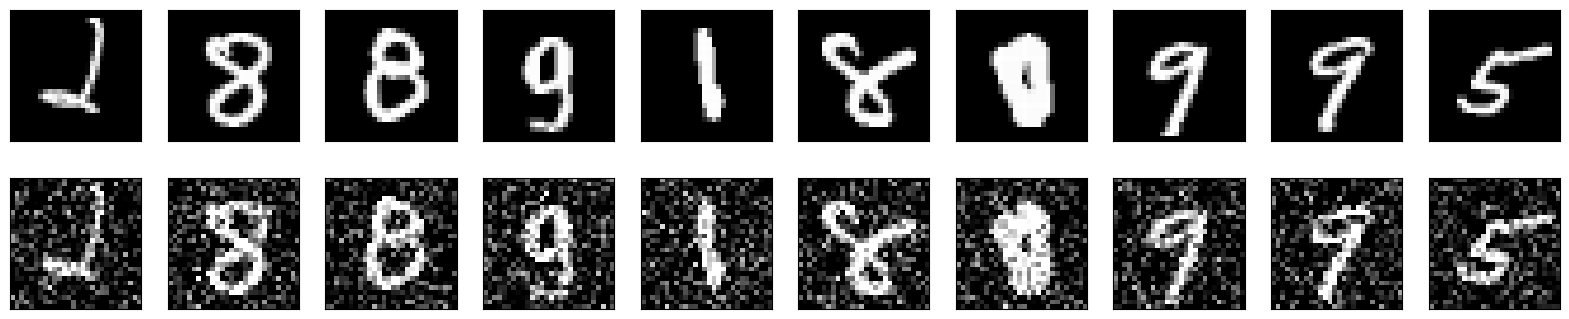

In [15]:
# only need data no targets
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)


noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)

## Now creating the AutoEncoder

In [16]:
# input shape is 28x28x1
input = layers.Input(shape=(28, 28, 1))

# The Encoder Model
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# The Decoder Model
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)


autoencoder = Model(input, x)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.fit(x = train_data,
                y=train_data,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(test_data, test_data))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - loss: 0.2604 - val_loss: 0.0732
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.0725 - val_loss: 0.0695
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.0697 - val_loss: 0.0682
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - loss: 0.0683 - val_loss: 0.0673
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - loss: 0.0676 - val_loss: 0.0667
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - loss: 0.0668 - val_loss: 0.0662
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - loss: 0.0660 - val_loss: 0.0654
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 109ms/step - loss: 0.0659 - val_loss: 0.0651
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - loss: 0.0654 - val_loss: 0.0648
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 90ms/step - loss: 0.0651 - val_loss: 0.0646
Epoch 12/50
469/469 ━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


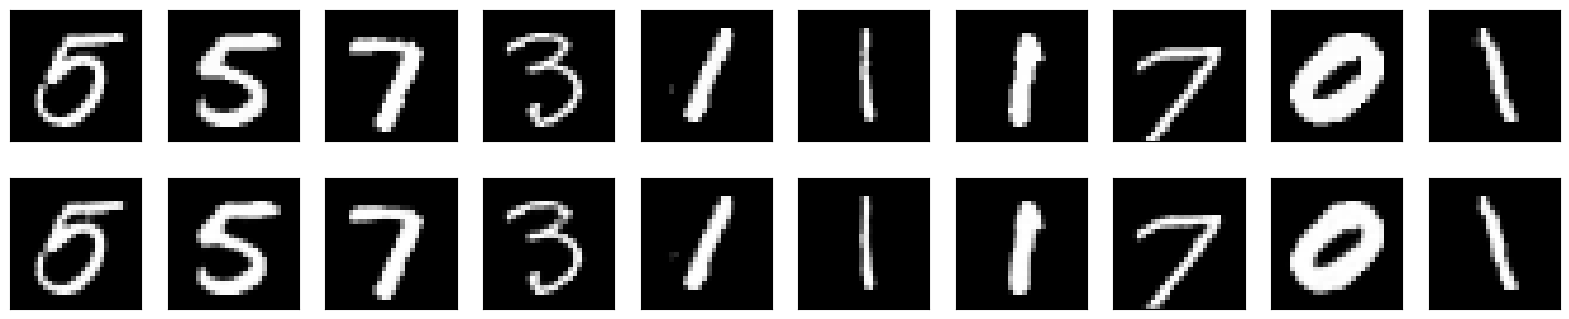

In [18]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


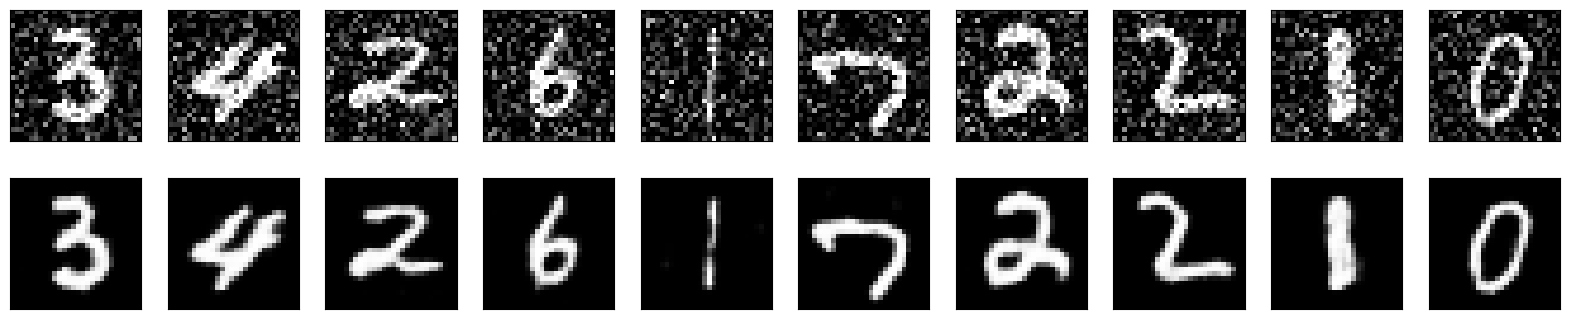

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0816 - val_loss: 0.0801
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - loss: 0.0804 - val_loss: 0.0793
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 98ms/step - loss: 0.0796 - val_loss: 0.0788
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - loss: 0.0792 - val_loss: 0.0784
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 92ms/step - loss: 0.0788 - val_loss: 0.0782
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 0.0787 - val_loss: 0.0780
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - loss: 0.0782 - val_loss: 0.0777
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 141ms/step - loss: 0.0780 - val_loss: 0.0774
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - loss: 0.0779 - val_loss: 0.0776
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


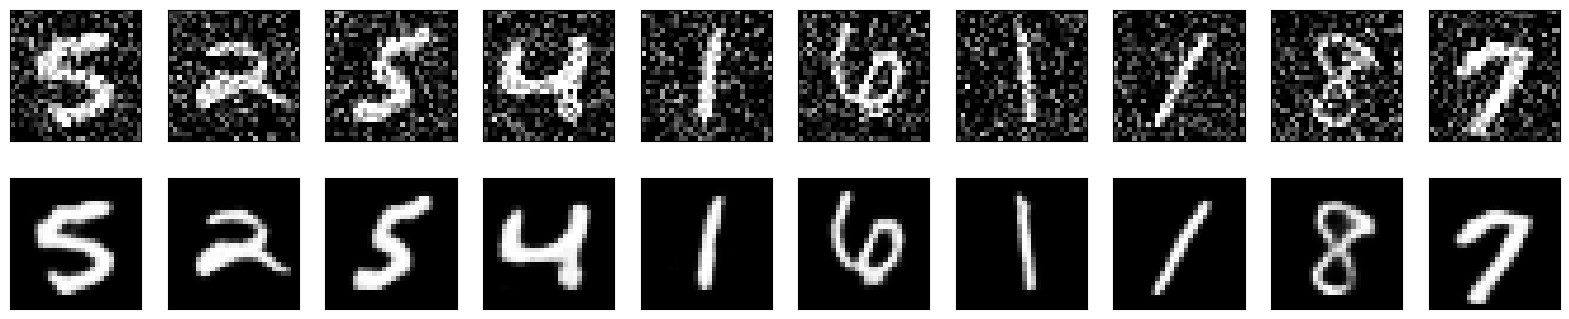

In [21]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

autoencoder.fit(x=noisy_train_data,
                y=train_data,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(noisy_test_data, test_data))


predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)


## Hence we successfully remove noise from quite noisy images